# Libros best seller de Amazon 2009-2019

#### Librerias

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importando el dataset

In [64]:
book = pd.read_csv('bestsellers with categories.csv')
book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [61]:
book.groupby(['Name','Author','Genre'], as_index=False)[['User Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(10)

,Name,Author,Genre,User Rating,Reviews,Weighted Rating
178,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.9,21834.0,4.899524
116,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,19622.0,4.899470
140,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9,19576.0,4.899469
310,The Very Hungry Caterpillar,Eric Carle,Fiction,4.9,19546.0,4.899468
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0,4.899275
69,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,12619.0,4.899177
151,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Fiction,4.9,11881.0,4.899126
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0,4.898967
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,4.9,9413.0,4.898897
208,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.9,9382.0,4.898894


### Verificando el data set

In [65]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


### Verificando valores faltantes en el data set

In [66]:
book.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

### Verificando valores duplicados

In [67]:
book['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
                                                                                ..
Dead in the Family (Sookie Stackhouse/True Blood, Book 10)                       1
The Paris Wife: A Novel                                                          1
The Short Second Life of Bree Tanner: An Eclipse Novella (The Twilight Saga)     1
Shred: The Revolutionary Diet: 6 Weeks 4 Inches 2 Sizes                          1
Breaking Dawn (The Twilight Saga, Book 4)                                        1
Name: Name, Length: 351, dtype: int64

## Realizando el analisis exploratorio de datos 

In [68]:
print(book['Genre'].value_counts())
print()
print(book['Genre'].value_counts(normalize=True))

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64


Hay más libros de "no ficción" en los rankings más vendidos, con aproximadamente el 56% del conjunto de datos más vendido que pertenece a libros de no ficción, esto incluye todo, desde memorias hasta libros de arte y fotografía.

### Clasificaciones de libros

La clasificación da un número relativamente alto de calificaciones (4.9), sin embargo, podemos ver diferencias significativas en el número de reseñas, con algunos libros que tienen poco más de 3000 reseñas mientras que otros tienen alrededor de 20,000. Una calificación ponderada, que toma en consideración el número de reseñas, será una mejor opción para esta clasificación.

$$Calificación \; Ponderada \; (WR)= \left( \dfrac{v}{v+m} \cdot R \right) + \left( \dfrac{m}{v+m} \cdot C\right)$$

- R = Calificación promedio del libro
- v = Número de reseñas del libro
- m = Revisiones mínimas necesarias para aparecer en la lista de los más vendidos
- C = La calificación media en el conjunto de datos

In [82]:
# Calificación ponderada

m = min(book['Reviews'])
C = book['User Rating'].mean()

def ponderada(x, m=m, C=C):
    v = x['Reviews']
    R = x['User Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

book['Calificación ponderada'] = book.apply(ponderada, axis=1)

book.groupby(['Name','Author','Genre'], as_index=False)[['User Rating','Reviews','Calificación ponderada']].mean().sort_values('Calificación ponderada',ascending=False).head(10)

,Name,Author,Genre,User Rating,Reviews,Calificación ponderada
178,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.9,21834.0,4.899524
116,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,19622.0,4.899470
140,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9,19576.0,4.899469
310,The Very Hungry Caterpillar,Eric Carle,Fiction,4.9,19546.0,4.899468
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0,4.899275
69,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,12619.0,4.899177
151,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Fiction,4.9,11881.0,4.899126
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0,4.898967
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,4.9,9413.0,4.898897
208,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.9,9382.0,4.898894


Si bien una serie de filas en la columna de calificación ponderada aún se pueden redondear a 4.9, existe una diferencia suficiente entre los diversos libros como para clasificarlos. Como acotación al margen, nueve de los 10 libros principales, según las clasificaciones ponderadas, pertenecen al género de ficción. Esto podría tomarse como una señal del dominio del género de ficción en los rankings de calificación.

#### Relación entre valoraciones y reseñas de usuarios

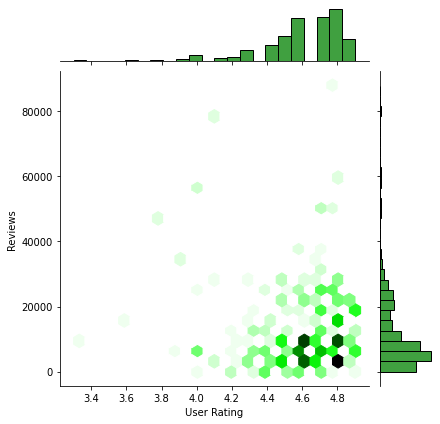

In [86]:
sns.jointplot(x='User Rating',y='Reviews',data=book,kind='hex',color='Green')

A partir de esto, podemos ver que los libros con una calificación más alta tienen menos número de revisiones, excepto unos pocos y los libros con calificaciones de 3.8 - 4.2 son los que tienen el mayor número de revisiones, lo que muestra que estos datos no están normalizados.

### Gráficos de correlación

In [88]:
book.corr()

,User Rating,Reviews,Price,Year,Calificación ponderada
User Rating,1.000000,-0.001729,-0.133086,0.242383,0.999949
Reviews,-0.001729,1.000000,-0.109182,0.263560,-0.003530
Price,-0.133086,-0.109182,1.000000,-0.153979,-0.132978
Year,0.242383,0.263560,-0.153979,1.000000,0.241403
Calificación ponderada,0.999949,-0.003530,-0.132978,0.241403,1.000000


<AxesSubplot:>

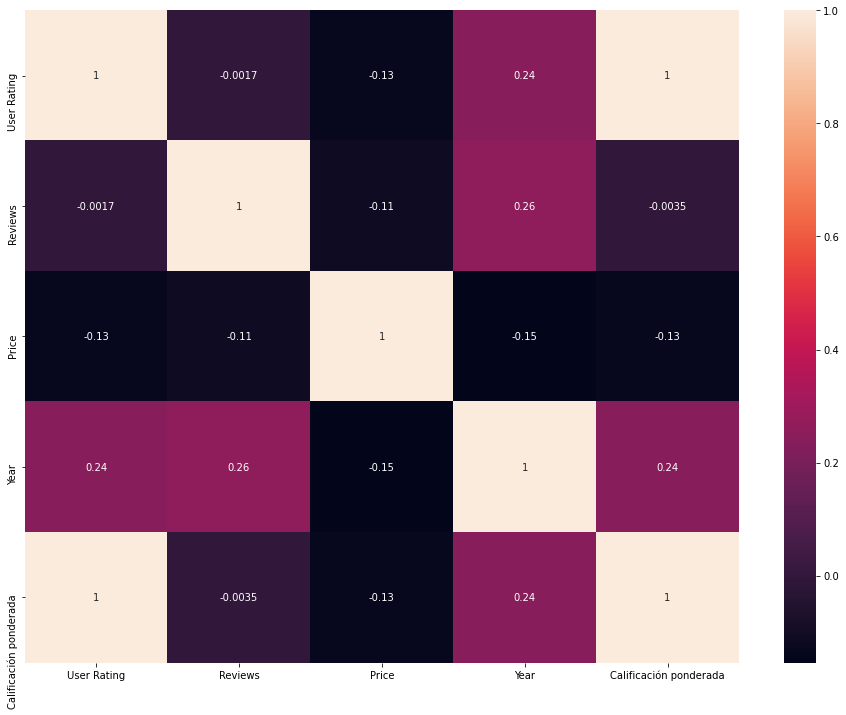

In [89]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(book.corr(),annot=True,ax=ax)

Vemos que no queda claro en ninguna combiniación de correlación.